<a href="https://colab.research.google.com/github/UICHEOL-HWANG/colab_upload/blob/master/naver_api2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup as bs
import datetime
import json
import getpass
import os
import sys
import urllib.request

In [2]:
pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.1 MB/s eta 0:00:00


In [149]:
def getData(client_id,client_secret):
  url = "https://openapi.naver.com/v1/datalab/search";
  body = '''{\"startDate\":\"2022-01-01\",\"endDate\":\"2023-02-28\",
\"timeUnit\":\"month\",
\"keywordGroups\":[{\"groupName\":\"농협\",\"keywords\":[\"농협\",\"농협은행\",\"NH농협은행\"]},
{\"groupName\":\"신한은행\",\"keywords\":[\"신한\",\"신한은행\"]},
{\"groupName\":\"국민은행\",\"keywords\":[\"국민 은행\",\"국민은행\"]}]}
'''
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()

  try:
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  except:
    logging.error(response.read())
    sys.exit(1)
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))

  if response.getcode() == 200:
    response_body = response.read()
    contents = response_body.decode("utf-8")
  else:
    print(response.getcode())
    print(response.read())
    sys.exit(1)

  return contents

def getFrame():
  client_id = getpass.getpass("아이디 입력 :" )
  client_secret = getpass.getpass("비밀번호 입력 :")
  bank_data = getData(client_id,client_secret)
  data = json.loads(bank_data)
  dt = dict()
  month = []

  for i in data['results'][0]['data']: # 날짜 값을 month라는 리스트 안에 넣어드림
    month.append(i['period'])

  for j in range(0,3): # 슬라이싱 0부터 3까지 보통 0은 date 날짜이고 1,2,3까지는 result 안에 들어가 있는 농협,신한,국민 순의 데이터들로 확인된다.
    ratio = []
    for a in data['results'][j]['data']:
      ratio.append(a['ratio'])
      dt[data['results'][j]['title']] = ratio

  df = pd.DataFrame.from_dict(dt)
  df['연월'] = month
  df['날짜'] = df['연월'].apply(lambda x : x[2:7]) # apply 람다를 통해 2022-01-01을 22-01 년 2자리 월 2자리로 치환해준다.
  final_df = df.set_index('날짜') # Index 엑셀로 치면 행값의 메인을 날짜로 두는 것
  return final_df

def getGraph():
  plt.rcParams['font.size'] = 12
  plt.figure(figsize =(16,8))

  plt.plot(getFrame().index,getFrame()['농협'])
  for x,y in enumerate(list(getFrame()['농협'])):
    plt.text(x,y,y, fontsize = 10,color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')

  plt.plot(getFrame().index,getFrame()['신한은행'])
  for x,y in enumerate(list(getFrame()['신한은행'])):
    plt.text(x,y,y, fontsize = 10,color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')

  plt.plot(getFrame().index,getFrame()['국민은행'])
  for x,y in enumerate(list(getFrame()['국민은행'])):
    plt.text(x,y,y, fontsize = 10,color ='#ff0000',
             horizontalalignment= 'center',verticalalignment = 'bottom')

  plt.legend(['농협','신한은행','국민은행'],loc = 'upper left')
  return plt.show()

In [124]:
getFrame()

,농협,신한은행,국민은행,연월
날짜,,,,
22-01,40.29327,67.83671,100.00000,2022-01-01
22-02,38.85809,64.75161,97.18744,2022-02-01
22-03,39.97603,65.58966,90.14748,2022-03-01
22-04,29.62997,51.06709,77.84874,2022-04-01
22-05,31.81328,53.91551,83.38823,2022-05-01
22-06,28.79297,48.63271,75.15088,2022-06-01
22-07,29.83266,50.35936,76.74379,2022-07-01
22-08,29.43290,49.19102,76.76710,2022-08-01
22-09,28.20304,48.18448,73.46621,2022-09-01


아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········
아이디 입력 :··········
비밀번호 입력 :··········


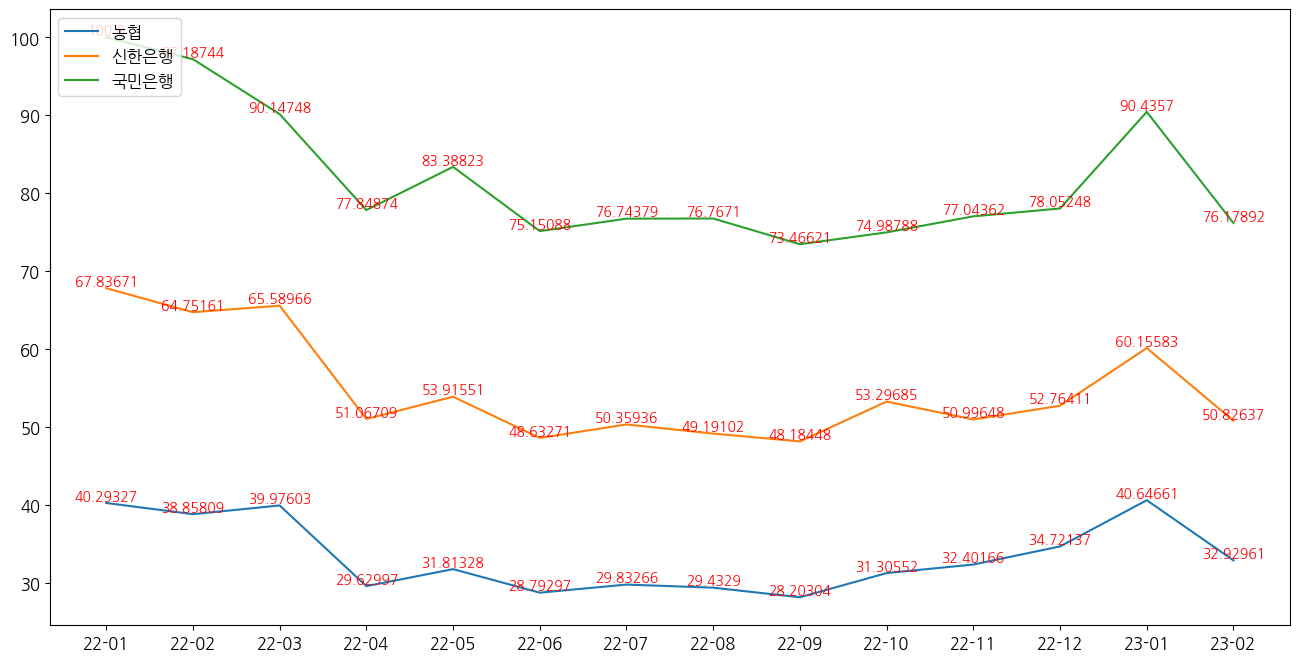

In [150]:
getGraph() #천신만고 개 노가다 끝에 getpass로 api key를 막았다...